0806

# 최적화 함수 (Optimizer)

In [90]:
import numpy as np 
import matplotlib.pyplot as plt

### 간단한 SGD

In [91]:
data_sample = np.random.uniform(-2, 2, size=10)

def loss(x):
    return x ** 2 

def gradient(x):
    return 2 * x 

In [92]:
def sgd(lr=0.1, epochs=10):
    w = np.random.uniform(-2,2)
    history = [w]

    for _ in range(epochs):
        sample = np.random.choice(data_sample)  # sgd는 비복원추출이지만 실습에서는 복원추출로 진행
        grad = gradient(sample)
        w -= lr * grad 
        history.append(w)

    return history

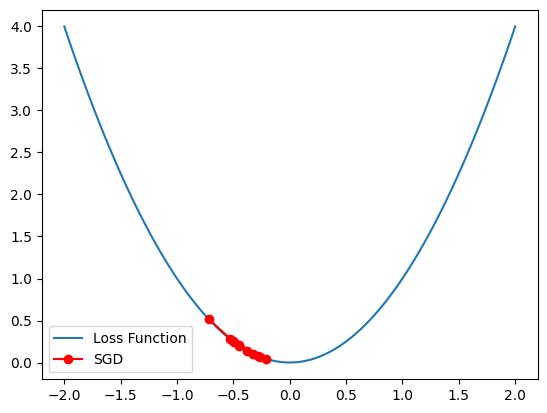

In [93]:
history = sgd()
x_vals = np.linspace(-2, 2, 100)    
plt.plot(x_vals, loss(x_vals), label = 'Loss Function')
plt.plot(history, loss(np.array(history)), 'ro-', label="SGD")

plt.legend()
plt.show()

### 모멘텀 추가

In [94]:
def sgd_momentom(lr=0.1, momentum=0.9,epochs=10):
    w = np.random.uniform(-2,2)
    v = 0
    history = [w]

    for _ in range(epochs):
        sample = np.random.choice(data_sample)  # sgd는 비복원추출이지만 실습에서는 복원추출로 진행
        grad = gradient(sample)
        v = momentum * v - lr *grad
        w += v 
        history.append(w)

    return history

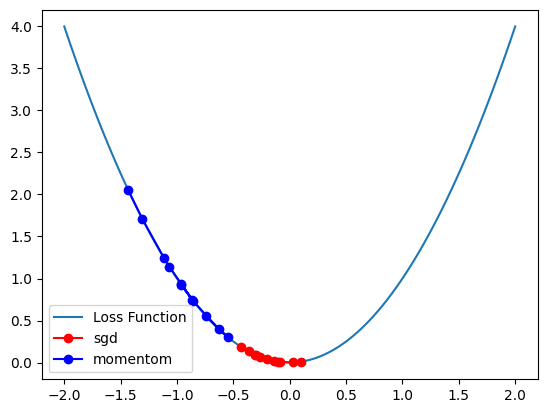

In [95]:
sgd_history = sgd()
momentom_history = sgd_momentom()

x_vals = np.linspace(-2, 2, 100)
plt.plot(x_vals, loss(x_vals), label='Loss Function')
plt.plot(sgd_history, loss(np.array(sgd_history)), 'ro-', label='sgd')
plt.plot(momentom_history, loss(np.array(momentom_history)), 'bo-', label='momentom')

plt.legend()
plt.show()

### 학습률에 따른 SGD

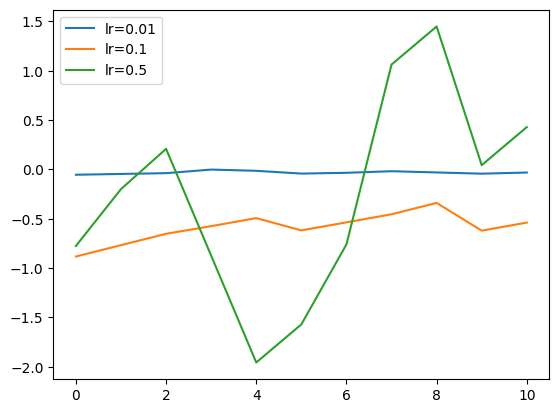

In [96]:
learning_rates = [0.01, 0.1, 0.5]
histories = [sgd(lr=lr) for lr in learning_rates]

plt.Figure(figsize=(5, 3))
for i, history in enumerate(histories):
    plt.plot(history, label=f'lr={learning_rates[i]}')
plt.legend()
plt.show()

### AdaGrad

In [97]:
def adagrad(lr=0.1, epsilon=1e-8, epochs=10):
    w = np.random.uniform(-2, 2)   # 랜덤값으로 가중치 초기화 
    h = 0                          # 기울기를 기억하는 아이라 기울기 초기화 
    history = [w]

    for _ in range(epochs):
        grad = gradient(w)
        h += grad ** 2
        w -= (lr /(np.sqrt(h) + epsilon)) * grad   # 기울기 이동이 많을 수록 학습률이 줄어든다?
        history.append(w)

    return history

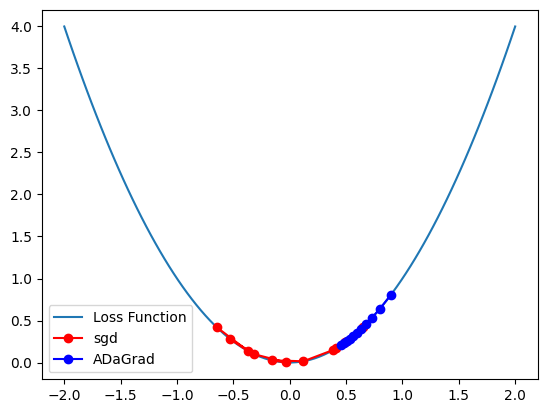

In [98]:
# sgd, adagrad 비교 : sgd의 경우, 줄줄이 내려오는 경향을 보이는 경향이 있는 반면. adagrad는 오밀조밀하게 모이는 경향을 볼 수 있음.(최적점을 찾기도 전에)
sgd_history = sgd()
adagrad_history = adagrad()

x_vals = np.linspace(-2, 2, 100)
plt.plot(x_vals, loss(x_vals), label='Loss Function')
plt.plot(sgd_history, loss(np.array(sgd_history)), 'ro-', label='sgd')
plt.plot(adagrad_history, loss(np.array(adagrad_history)), 'bo-', label='ADaGrad')

plt.legend()
plt.show()

### RMSprop

In [99]:
def rmsprop(lr=0.1, beta=0.9, epsilon=1e-8, epochs=10):   # adagrad 개선
    w = np.random.uniform(-2, 2)   # 랜덤값으로 가중치 초기화 
    h = 0                          # 기울기를 기억하는 아이라 기울기 초기화 
    history = [w]

    for _ in range(epochs):
        grad = gradient(w)
        h += (beta * h) + ((1 - beta) * grad ** 2) 
        w -= (lr /(np.sqrt(h) + epsilon)) * grad   # 기울기 이동이 많을 수록 학습률이 줄어든다?
        history.append(w)

    return history

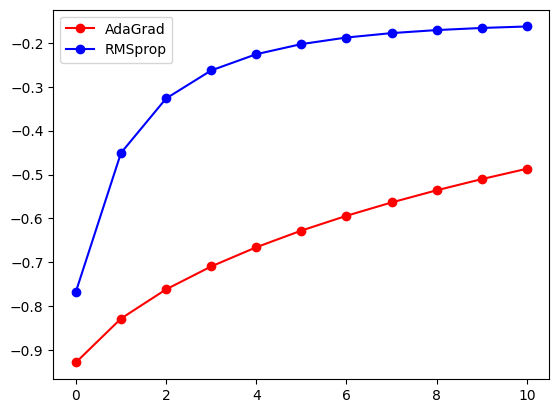

In [100]:
adagrad_history = adagrad()
rmsprop_history = rmsprop()

plt.plot(range(11), adagrad_history, 'ro-', label='AdaGrad')
plt.plot(range(11), rmsprop_history, 'bo-', label='RMSprop')
plt.legend()
plt.show()

### Adam

In [103]:
def adam(lr=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8, epochs=10) :
    w = np.random.uniform(-2, 2)
    m, v = 0, 0                      # 학습 시작 시에는 0부터 시작해서 시작치가 매우 낮음 
    history = [w]

    for t in range(1, epochs+1):
        grad = gradient(w)

        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * grad ** 2
        m_hat = m / (1 - beta1 ** t)                   
        v_hat = v / (1 - beta2 ** t)
        w -= (lr / (np.sqrt(v_hat) + epsilon)) * m_hat   # 시작값이 너무 작아 임의의 가중치를 만들어줌

        history.append(w)

    return history 

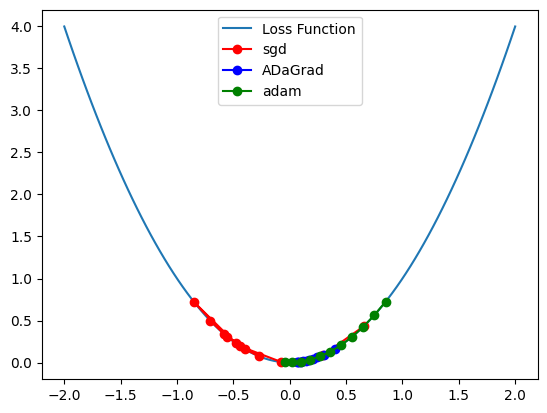

In [104]:
sgd_history = sgd()
adagrad_history = adagrad()
adam_history = adam()

x_vals = np.linspace(-2, 2, 100)
plt.plot(x_vals, loss(x_vals), label='Loss Function')

plt.plot(sgd_history, loss(np.array(sgd_history)), 'ro-', label='sgd')
plt.plot(adagrad_history, loss(np.array(adagrad_history)), 'bo-', label='ADaGrad')
plt.plot(adam_history, loss(np.array(adam_history)), 'go-', label='adam')

plt.legend()
plt.show()

### PyTorch 활용 > SGD vs Adam 비교 

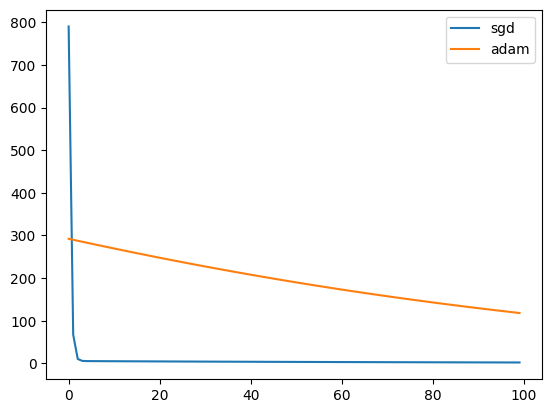

In [ ]:
import torch 
import torch.nn as nn 
import torch.optim as optim 

torch.manual_seed(42)

X = torch.rand(100, 1) * 10
y = 3 * X + 5 + (torch.rand(100, 1) * 0.3 )   # 뒤에 torch 어쩌고는 노이즈 값

model_sgd = nn.Linear(1, 1)
model_adam = nn.Linear(1, 1)
# model_adam.load_state_dict     # 초기값 동일하게 만드는 식 (깃 확인하기 )

criterion = nn.MSELoss()
optim_sgd = optim.SGD(model_sgd.parameters(), lr=0.01)
optim_adam = optim.Adam(model_adam.parameters(), lr=0.01)

epochs = 100
losses_sgd = []
losses_adam = []

for epoch in range(epochs):
    optim_sgd.zero_grad()
    outputs = model_sgd(X)
    loss = criterion(outputs, y)
    loss.backward()
    optim_sgd.step()
    losses_sgd.append(loss.item())
    
for epoch in range(epochs):
    optim_adam.zero_grad()
    outputs = model_adam(X)
    loss = criterion(outputs, y)
    loss.backward()
    optim_adam.step()
    losses_adam.append(loss.item())

plt.plot(losses_sgd, label='sgd')
plt.plot(losses_adam, label='adam')
plt.legend()
plt.show()


# sgd 는 어느 한 점에서 급격히 떨어지는 반면. adam 은 지속적인 우하향 그래프를 그림. 

# 종합실습

In [ ]:
# 1. 활성화 함수 및 손실 함수 정의 

def relu(z):
    return np.maximum(0, z)

def relu_d(x):
    return np.where(x > 0, 1, 0)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def cross_entropy_loss(y_true, y_pred):
    eps = 1e-8
    return -np.sum(y_true * np.log(y_pred + eps)) / y_true.shape[0]


# 2. 학습 데이터 준비 (5*5 픽셀 숫자)
digits = {
    "0": np.array([[1, 1, 1, 1, 1],
                   [1, 0, 0, 0, 1],
                   [1, 0, 0, 0, 1],
                   [1, 0, 0, 0, 1],
                   [1, 1, 1, 1, 1]]).flatten(),
    "1": np.array([[0, 0, 1, 0, 0],
                   [0, 1, 1, 0, 0],
                   [0, 0, 1, 0, 0],
                   [0, 0, 1, 0, 0],
                   [0, 1, 1, 1, 0]]).flatten()
}

X = np.array([digits['0'], digits['1']])
y = np.array([[1, 0], [0, 1]])

# 3. 신경망 구조 설정
input_size = 25
hidden_size = 10 
output_size = 2

# 가중치 초기화 (He 초기화)
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2. / hidden_size)
b2 = np.zeros((1, output_size))

# 4. 학습 (역전파 + SGD 최적화)
learning_rates = 0.01
epochs = 1000

for epoch in range(epochs):
    # 순전파 
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)

    # 손실 계산
    loss = cross_entropy_loss(y, A2)

    # 역전파
    dZ2 = A2 - y
    dW2 = np.dot(A1.T, dZ2) / X.shape[0]
    db2 = np.sum(dZ2, axis=0, keepdims=True) / X.shape[0]

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_d(Z1)
    dW1 = np.dot(X.T, dZ1) / X.shape[0]
    db1 = np.sum(dZ1, axis=0, keepdims=True) / X.shape[0]

    # 가중치 업데이트
    W1 -= learning_rates * dW1
    b1 -= learning_rates * db1
    W2 -= learning_rates * dW2
    b2 -= learning_rates * db2

    # epoch 100번째마다 손실 출력
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss:.4f}")

# 5. 예측 테스트 
def predict(x):
    z1 = np.dot(X, W1) + b1
    A1 = relu(z1)
    z2 = np.dot(A1, W2) + b2
    A2 = softmax(z2)
    return  np.argmax(A2, axis=1)

test_digit = np.array([[0, 0, 1, 0, 0],
                        [0, 0, 1, 0, 0],
                        [0, 0, 1, 0, 0],
                        [0, 0, 1, 0, 0],
                        [0, 0, 1, 0, 0]]).flatten().reshape(1, -1)   
print('예측 결과 값:', predict(test_digit))

Epoch 100, Loss: 0.3520
Epoch 200, Loss: 0.2549
Epoch 300, Loss: 0.1970
Epoch 400, Loss: 0.1581
Epoch 500, Loss: 0.1308
Epoch 600, Loss: 0.1107
Epoch 700, Loss: 0.0956
Epoch 800, Loss: 0.0837
Epoch 900, Loss: 0.0743
Epoch 1000, Loss: 0.0666
예측 결과 값: [0 1]


In [113]:
# 1. 활성화 함수 및 손실 함수 정의
def relu(x):
    return np.maximum(0, x)

def relu_d(x):
    return (x > 0).astype(float)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def cross_entropy_loss(y_pred, y_true):
    eps = 1e-8
    return -np.sum(y_true * np.log(y_pred + eps)) / y_true.shape[0]

# 2. 학습 데이터 준비 (5x5 픽셀 숫자)
digits = {
    "0": np.array([[1, 1, 1, 1, 1],
                   [1, 0, 0, 0, 1],
                   [1, 0, 0, 0, 1],
                   [1, 0, 0, 0, 1],
                   [1, 1, 1, 1, 1]]).flatten(),
    "1": np.array([[0, 0, 1, 0, 0],
                   [0, 1, 1, 0, 0],
                   [0, 0, 1, 0, 0],
                   [0, 0, 1, 0, 0],
                   [0, 1, 1, 1, 0]]).flatten()
}

X = np.array([digits['0'], digits['1']])
y = np.array([[1, 0], [0, 1]])

# 3. 신경망 구조 설정
input_size = 25
hidden_size = 10
output_size = 2

# 4. 가중치 초기화 (He 초기화)
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2. / hidden_size)
b2 = np.zeros((1, output_size))

learning_rate = 0.01
epochs = 1000

for epoch in range(epochs):
    # 순전파
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    y_pred = softmax(z2)

    # 손실 계산
    loss = cross_entropy_loss(y_pred, y)

    # 역전파
    
    # 출력층
    dz2 = (y_pred - y) / X.shape[0]
    dW2 = np.dot(a1.T, dz2)
    db2 = np.sum(dz2, axis=0, keepdims=True)

    # 은닉층
    da1 = np.dot(dz2, W2.T)
    dz1 = da1 * relu_d(z1)
    dW1 = np.dot(X.T, dz1)
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # 가중치 업데이트
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    # epoch 100번째마다 손실 출력
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss:.4f}")

# 5. 학습 (역전파 + SGD 최적화)
def predict(x):
    z1 = np.dot(x, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    y_pred = softmax(z2)
    return y_pred

test_digit = np.array([[0, 0, 1, 0, 0],
                        [0, 0, 1, 0, 0],
                        [0, 0, 1, 0, 0],
                        [0, 0, 1, 0, 0],
                        [0, 0, 1, 0, 0]]).flatten().reshape(1, -1)
print('예측 결과 값:', predict(test_digit))

# 6. 예측 테스트

Epoch 100, Loss: 0.0686
Epoch 200, Loss: 0.0316
Epoch 300, Loss: 0.0194
Epoch 400, Loss: 0.0136
Epoch 500, Loss: 0.0103
Epoch 600, Loss: 0.0082
Epoch 700, Loss: 0.0068
Epoch 800, Loss: 0.0057
Epoch 900, Loss: 0.0050
Epoch 1000, Loss: 0.0044
예측 결과 값: [[0.04733441 0.95266559]]
